## TF-IDF example

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()

corpus = ['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn)',
          'sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up',
          'When I couldnt find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a',
          '2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices.',
          'Find out how you can protect yourself and loved ones from #coronavirus. ?',
          'Prices of surgical masks have increased six-fold, N95 respirators have more than trebled',
          'gowns cost twice as much""-@DrTedros #coronavirusHI TWITTER! I am a pharmacist. I sell hand',
          'sanitizer for a living! Or I do when any exists. Like masks, it is sold the fuck out everywhere.',
          'SHOULD YOU BE WORRIED? No. Use soap. SHOULD YOU VISIT TWENTY PHARMACIES LOOKING FOR THE LAST BOTTLE?']

transformed = v.fit_transform(corpus)

In [2]:
print(transformed.toarray()[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.30151134
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.30151134
 0.30151134 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.30151134 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.30151134 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.30151134
 0.         0.         0.         0.         0.         0.
 0.30151134 0.         0.         0.         0.         0.
 0.         0.30151134 0.         0.         0.         0.
 0.         0.30151134 0.         0.         0.         0.
 0.         0.         0.         0.30151134 0.         0.
 0.30151134 0.         0.       

## Actual Project

In [3]:
import pandas as pd
df = pd.read_csv("D:\Jupyter\jupyter notebook\datasets\ecommerceDataset.csv")


In [4]:
df.columns = ['category','text']
df['category'].value_counts()

map = {'Household':0,
        'Books':1,
       'Electronics':2,
       'Clothing & Accessories':3}

In [5]:
df['text'] = df['text'].fillna('') # filling the null values with empty string

In [6]:
df['cat'] = df['category'].map(map) # creating a separate column where categories are labelencoded

In [7]:
df.shape

(50424, 3)

In [8]:
# import spacy
# nlp = spacy.load(
#     "en_core_web_sm",
#     disable=["ner", "parser"]
# )

# def spacy_tokenizer(text):
#     doc = nlp(text)
#     return [
#         token.lemma_
#         for token in doc
#         if not token.is_stop and not token.is_punct
#     ]



**Note: This preprocessing will take time** 

*around 20 mins on my computer*

In [9]:
df.head()

,category,text,cat
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
3,Household,Incredible Gifts India Wooden Happy Birthday U...,0
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['cat'],
                                                    test_size = 0.3,
                                                    random_state = 34,
                                                    stratify = df['cat'])

In [11]:
X_train.head()

17259    Sugar Knocker Ayurvedic Medicine for Diabetes,...
41642    Generic High Gain 16dBi 2.4GHz Wifi Yagi Anten...
25176    Mathematics Formulae & Definitions (RPH Pocket...
9020     VRCT Classic Off-White Khadi Conical Shade and...
13333    V Guard VIC-15 2000-Watt Induction Cooktop (Bl...
Name: text, dtype: object

In [12]:
y_train.value_counts()

0    13518
1     8274
2     7434
3     6070
Name: cat, dtype: int64

In [13]:
y_test.value_counts()

0    5794
1    3546
2    3187
3    2601
Name: cat, dtype: int64

In [14]:
# now training this data on different models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [15]:
pipe = Pipeline([
                ('tf-idf',TfidfVectorizer( 
                                            lowercase=False,
                                            max_features=5000)),
                ('model',LinearSVC())
                ])

pipe.fit(X_train,y_train)

C:\Users\vishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tf-idf', TfidfVectorizer(lowercase=False, max_features=5000)),
                ('model', LinearSVC())])

In [16]:
from sklearn.metrics import classification_report, confusion_matrix


pred = pipe.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5794
           1       0.96      0.96      0.96      3546
           2       0.97      0.95      0.96      3187
           3       0.98      0.98      0.98      2601

    accuracy                           0.97     15128
   macro avg       0.97      0.97      0.97     15128
weighted avg       0.97      0.97      0.97     15128



In [17]:
cm = confusion_matrix(y_test,pred)
print(cm)


[[5613   67   73   41]
 [  82 3421   28   15]
 [  96   43 3040    8]
 [  39   16    8 2538]]


<Axes: >

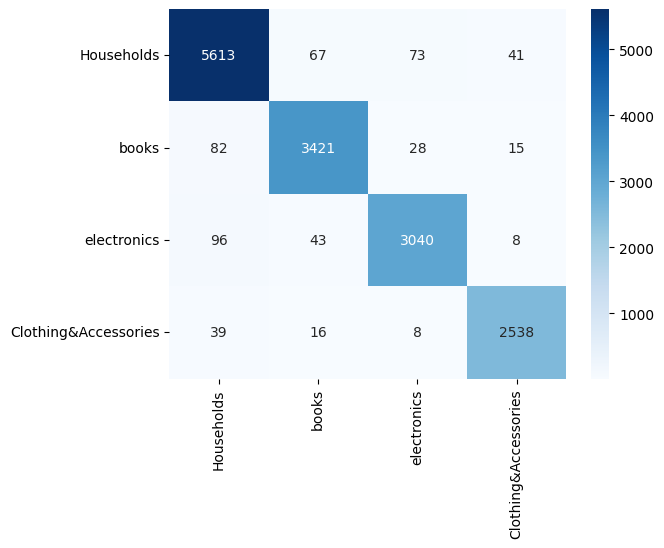

In [18]:
import seaborn as sns
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Households','books','electronics','Clothing&Accessories'],
    yticklabels=['Households','books','electronics','Clothing&Accessories']
)